# **Data Processing**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [4]:
skin_df = pd.read_csv('cancer/HAM10000_metadata.csv')

In [7]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                              for x in glob(os.path.join('cancer/', '*', '*.jpg'))}

In [9]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [10]:
print(skin_df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


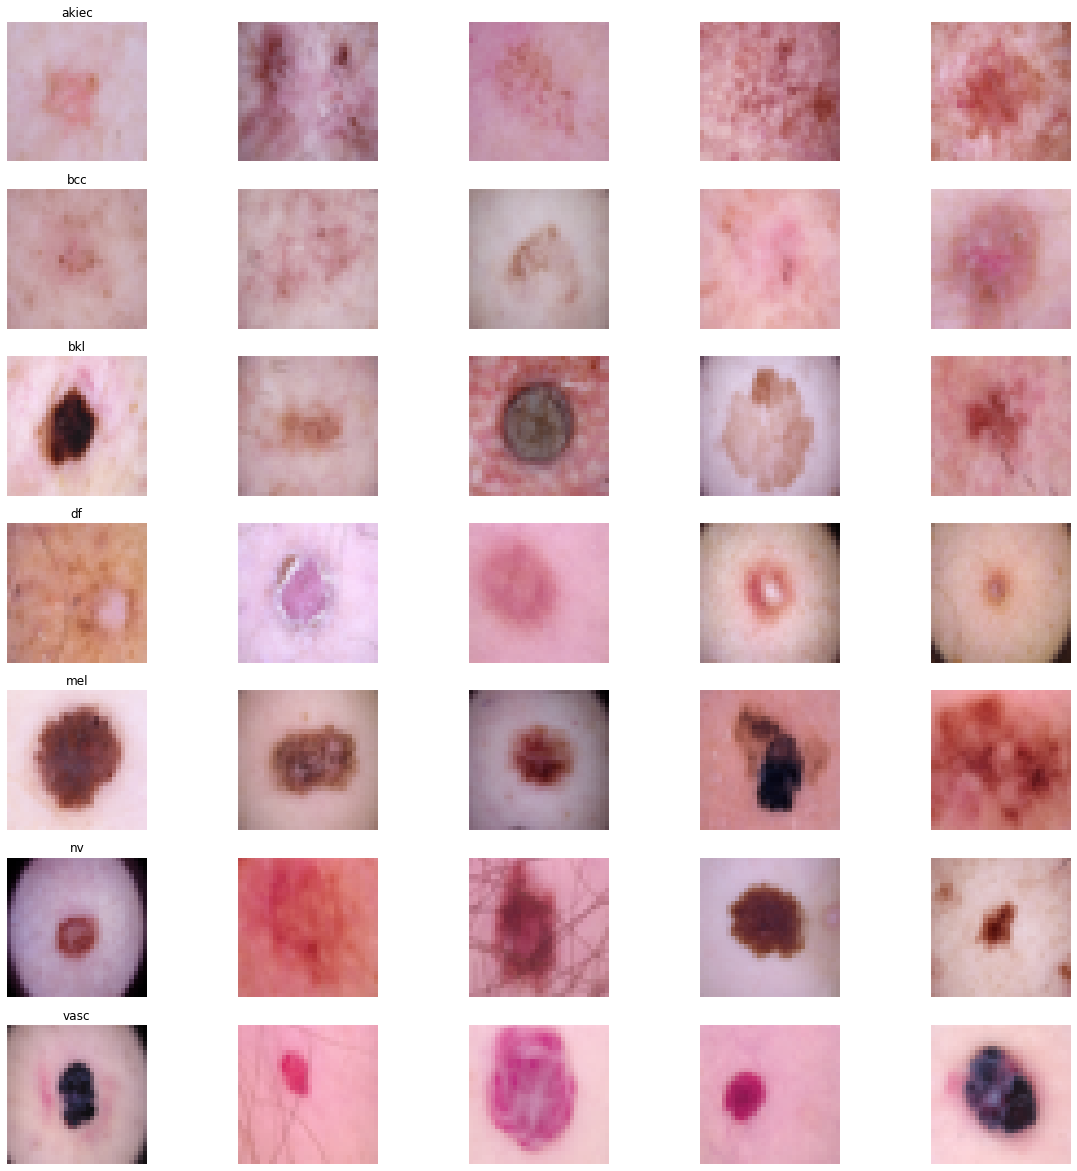

In [12]:
#number of samples for plotting
n_samples = 5
#Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(['dx']).groupby('dx')):
    
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [13]:
import pandas as pd
import os
import shutil

In [20]:
data_dir = os.getcwd() + "/cancer/all_images/"
dest_dir = os.getcwd() + "/cancer/reorganized/"

In [21]:
skin_df2 = pd.read_csv('cancer/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [22]:
label = skin_df2['dx'].unique().tolist()
label_images = []

In [28]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/" + id + ".jpg"), (dest_dir + i + "/" + id + ".jpg"))
    label_image=[]

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
datagen = ImageDataGenerator()

In [31]:
train_dir = os.getcwd() + "/cancer/reorganized/"
train_data_keras = datagen.flow_from_directory(directory=train_dir, class_mode='categorical', batch_size=16, target_size=(32,32))

Found 54731 images belonging to 7 classes.


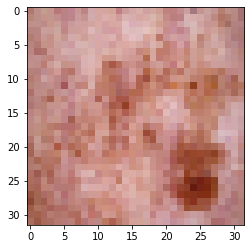

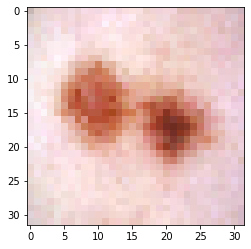

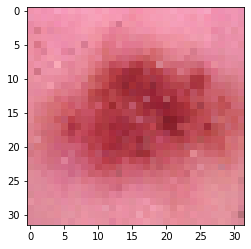

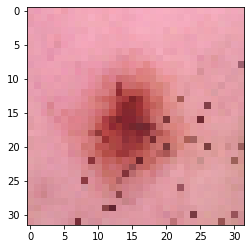

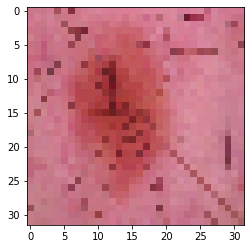

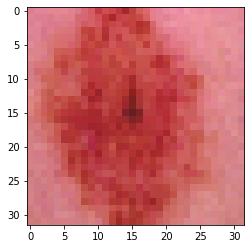

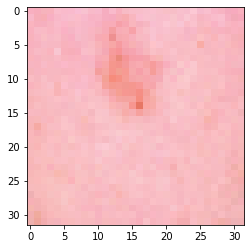

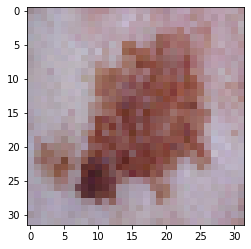

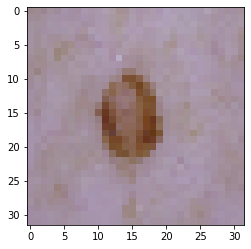

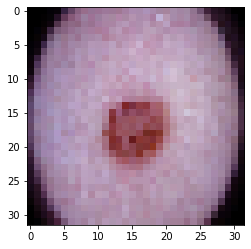

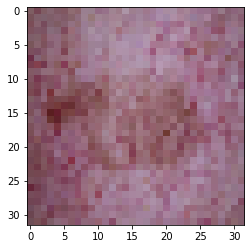

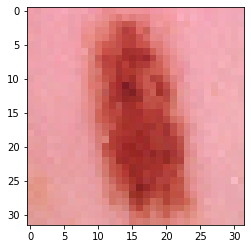

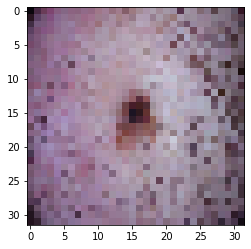

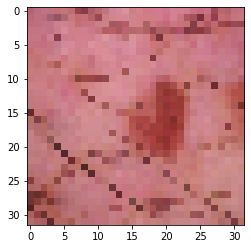

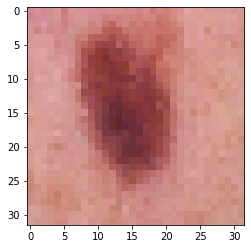

In [32]:
x,y = next(train_data_keras)

for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()